# Statistics

In [0]:
# import needed librarie
import math
import numpy as np
import pandas as pd


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# assign list a varriable
sales = np.array([3505,2400,3027,2798,3700,3250,2689])

In [161]:
# calculate the mean without using functions
total = sum(sales) #calculate the sum of all values in the array
sales_mean = round(total/len(sales)) # round the the results of sales_sum/n
print("sales average for the past week: ", sales_mean)

sales average for the past week:  3053.0


In [0]:
# write a function for calculating mean of any sized list
def average(list):
  print("The average of this list is: ", round(sum(list) / len(list),5))

In [163]:
# try our new functions
average(sales)

The average of this list is:  3052.71429


In [0]:
# calculate the variance 

In [0]:
def subtract_mean(number): 
  return number-sales_mean 

In [166]:
# distances from each numbers in sales list from the mean
distances = list(map(subtract_mean, sales))
distances

[452.0, -653.0, -26.0, -255.0, 647.0, 197.0, -364.0]

In [167]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[204304.0, 426409.0, 676.0, 65025.0, 418609.0, 38809.0, 132496.0]

In [168]:
# how long is the list
list_length_sample = len(squared_distances) - 1 # to get the length of for sample from the population
list_length = len(squared_distances) # for a whole population (no sample)
list_length_sample

6

In [169]:
# calculate variance 
variance_sales = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_sales,3))

183761.14


In [0]:
# convert both lists to dataframes
sales_df = pd.DataFrame({'sales': sales})

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# list variables/lists
sales = np.array([3505,2400,3027,2798,3700,3250,2689])
customers = np.array([127, 80, 105, 92, 120, 115, 93])

In [172]:
# add customers to sales_df
sales_df['customers'] = pd.Series(customers)

# check
sales_df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [173]:
# calculate the covariance using numpy
np.cov(sales, customers)

# covariance is 7604.35

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [174]:
# calculate the standard deviation of both lists
std_sales = sales_df['sales'].std(ddof=1)
std_customers = sales_df['customers'].std(ddof=1)

print(round(std_sales))
print(round(std_customers))

463
17


In [175]:
# calculate the covariance using pandas
cov_sc = sales_df['sales'].cov(sales_df['customers'])
print(round(cov_sc)) 

7604.0


In [0]:
# calculate the denominator
denom = std_sales*std_customers

In [177]:
# calculate the full formula
corr_sc = cov_sc/denom
corr_sc

0.9628339778148909

In [0]:
# a correlation coefficient of .96 suggests a positive correlation between number of sales 
# and number of customers. 

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [179]:
# import titanic data set
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

#check
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [180]:
# covariance for the entire dataset, not including non-numerical numbers
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [181]:
# correlation coefficient of numnerical columns
titanic.corr()


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# vectors
vector_1 = [3,3]
vector_2 = [1,-1]

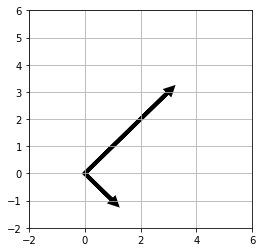

In [184]:
# plot both vectors
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,6)
plt.ylim(-2,6)

# plot the vectors
for vect in [vector_1, vector_2]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# assign variables
a = np.array([-5,3,2])
b = np.array([6,-8,2])

In [186]:
# check using dot menthod
np.dot(a,b)

# they are not orthogonal. dot product does not equal 0

-50

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# assign and convert
c = np.array([2,-15,6,20])

In [190]:
# find the norm of C
norm_c = np.linalg.norm(c)
print('{:.4f}'.format(norm_c))

25.7876


In [194]:
# find the dot product of by itself
print(np.dot(c,c))

665


In [197]:
# find the product of c tranposed and itself
(c.T)*c

array([  4, 225,  36, 400])

In [0]:
# the unit vector is equal to the squaroot of 665, which is the sum of the transpose of c multiplied by c
# the dot product equals 665, similar to all values in the thrid quantity

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

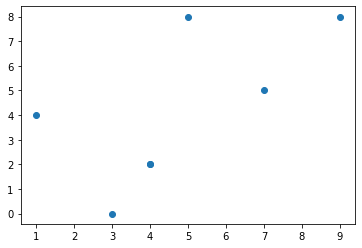

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()